## Description:
This dataset contains information on _customer_ _purchase_ _behavior_ across various attributes, aiming to help data scientists and analysts understand the factors influencing purchase decisions. The dataset includes demographic information, purchasing habits, and other relevant features.

**Features:**

**Age**: Customer's age  
**Gender**: Customer's gender (0: Male, 1: Female)  
**Annual Income**: Annual income of the customer in dollars  
**Number of Purchases**: Total number of purchases made by the customer  
**Product Category**: Category of the purchased product (0: Electronics, 1: Clothing, 2: Home Goods, 3: Beauty, 4: Sports)  
**Time Spent on Website**: Time spent by the customer on the website in minutes  
**Loyalty Program**: Whether the customer is a member of the loyalty program (0: No, 1: Yes)  
**Discounts Availed**: Number of discounts availed by the customer (range: 0-5)  
**PurchaseStatus (Target Variable)**: Likelihood of the customer making a purchase (0: No, 1: Yes)  


**Note**: Target Variable: The target variable, PurchaseStatus, indicates the likelihood of a customer making a purchase, with the following distribution: 0 (No Purchase): 48% 1 (Purchase): 52% 

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [24]:
DataSet=pd.read_csv("customer_purchase_data.csv")
df=DataSet.copy()
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [30]:
#Tüm Feature'lar sayısal. Kategorik olanları göz önünde bulundurcam.
#Na yok , yine de bakalım
df.isnull().any()

Age                   False
Gender                False
AnnualIncome          False
NumberOfPurchases     False
ProductCategory       False
TimeSpentOnWebsite    False
LoyaltyProgram        False
DiscountsAvailed      False
PurchaseStatus        False
dtype: bool

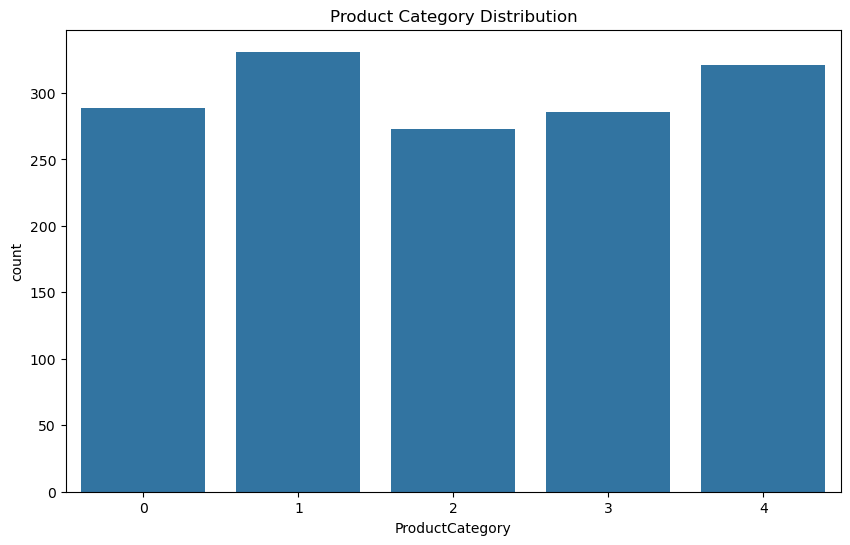

In [159]:
# Product Category distribution
plt.figure(figsize=(10,6))
sns.countplot(x='ProductCategory', data=df)
plt.title('Product Category Distribution')
plt.show()

In [39]:
df_encoded = pd.get_dummies(df, columns=['ProductCategory'], prefix='Product')
df_encoded.head(10)

,Age,Gender,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,Product_0,Product_1,Product_2,Product_3,Product_4
0,40,1,66120.267939,8,30.568601,0,5,1,True,False,False,False,False
1,20,1,23579.773583,4,38.240097,0,5,0,False,False,True,False,False
2,27,1,127821.306432,11,31.633212,1,0,1,False,False,True,False,False
3,24,1,137798.623120,19,46.167059,0,4,1,False,False,False,True,False
4,31,1,99300.964220,19,19.823592,0,0,1,False,True,False,False,False
5,66,1,37758.117475,14,17.827493,0,2,0,False,False,False,False,True
6,39,1,126883.385286,16,42.085384,1,4,1,False,False,False,True,False
7,64,1,39707.359724,13,17.190292,1,0,0,False,False,True,False,False
8,43,0,102797.301269,20,6.023475,0,3,0,False,True,False,False,False
9,20,1,63854.921080,16,38.572466,0,5,1,True,False,False,False,False


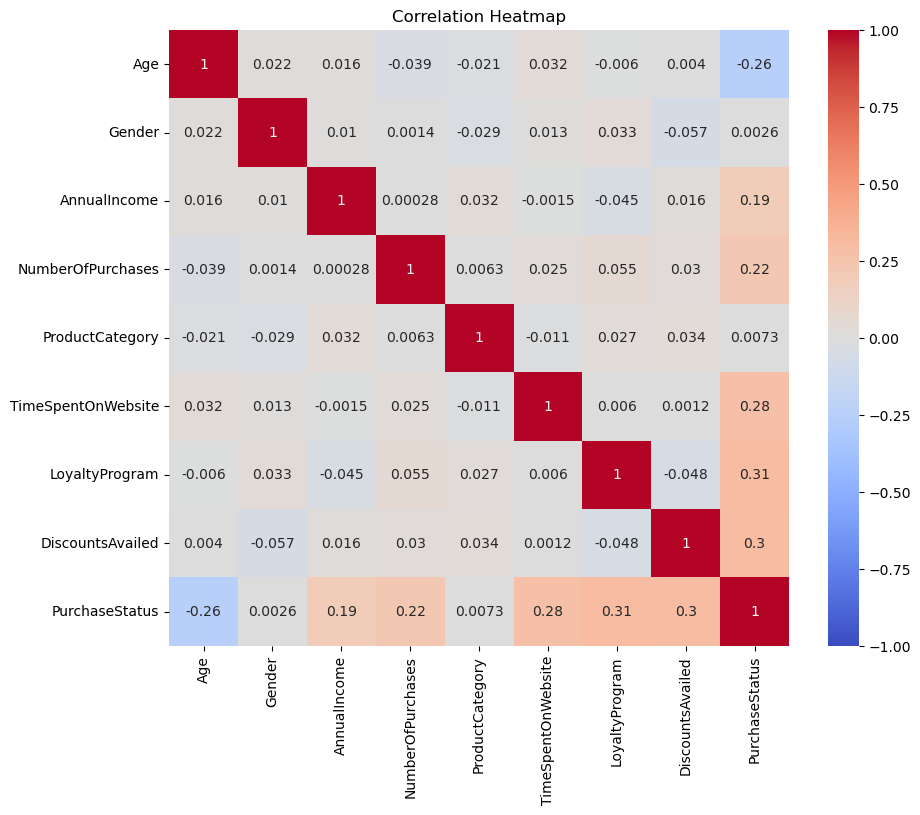

In [165]:
# Korelasyon matrisi oluşturma
corr_matrix = df.corr()

# Heatmap oluşturma
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [32]:
#Betimleyici istatistik verilerine bakalım
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,44.298667,15.537259,18.000000,31.000000,45.000000,57.000000,70.000000
Gender,1500.0,0.504667,0.500145,0.000000,0.000000,1.000000,1.000000,1.000000
AnnualIncome,1500.0,84249.164338,37629.493078,20001.512518,53028.979155,83699.581476,117167.772858,149785.176481
NumberOfPurchases,1500.0,10.420000,5.887391,0.000000,5.000000,11.000000,15.000000,20.000000
ProductCategory,1500.0,2.012667,1.428005,0.000000,1.000000,2.000000,3.000000,4.000000
TimeSpentOnWebsite,1500.0,30.469040,16.984392,1.037023,16.156700,30.939516,44.369863,59.991105
LoyaltyProgram,1500.0,0.326667,0.469151,0.000000,0.000000,0.000000,1.000000,1.000000
DiscountsAvailed,1500.0,2.555333,1.705152,0.000000,1.000000,3.000000,4.000000,5.000000
PurchaseStatus,1500.0,0.432000,0.495520,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
#ort yaş : 44 , std 15, geniş yayılım gösteriyor.
#annucal_income: std çok büyük, geniş yayılım.
#timespend: geniş yayılım

In [35]:
# Check the shape of the dataset
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (1500, 9)


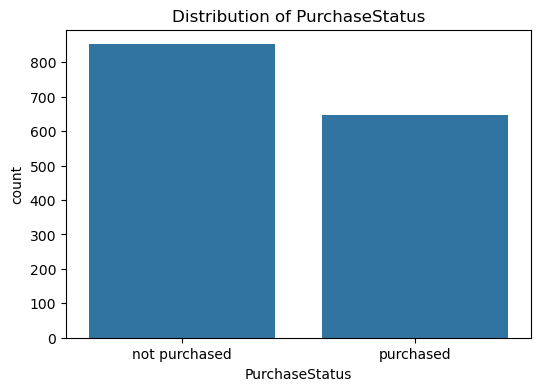

In [118]:
# Distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='PurchaseStatus', data=df_encoded)
plt.title('Distribution of PurchaseStatus')
plt.xticks(ticks=[0,1],labels=["not purchased","purchased"])
plt.show()

In [64]:
#Dengesiz veri seti değil.

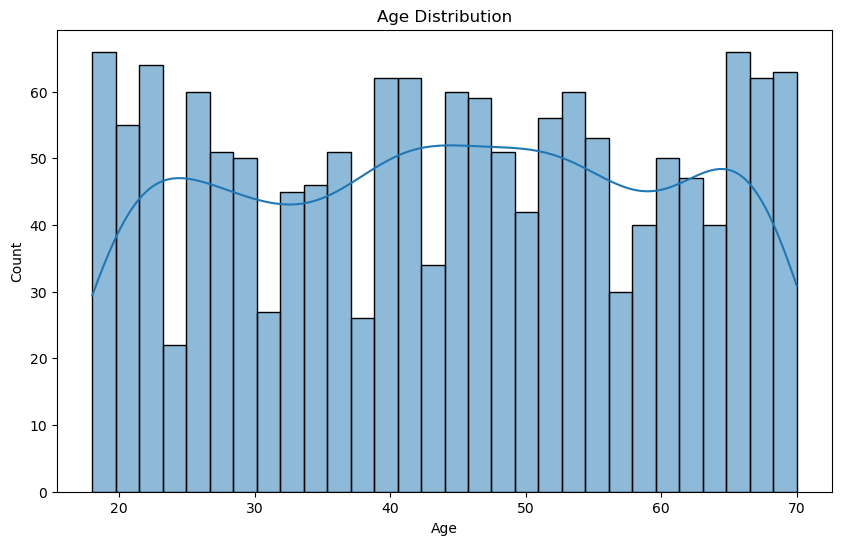

In [116]:
# Age distribution
plt.figure(figsize=(10,6))
sns.histplot(df_encoded['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

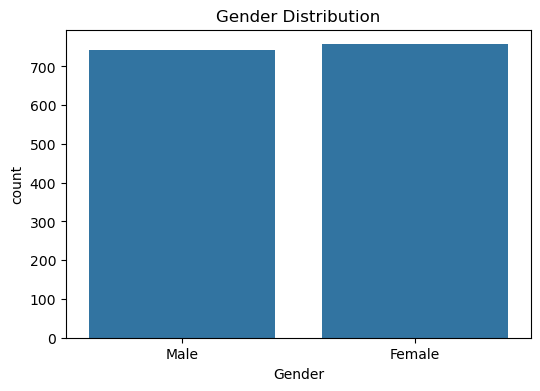

In [108]:
# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df_encoded)
plt.title('Gender Distribution')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

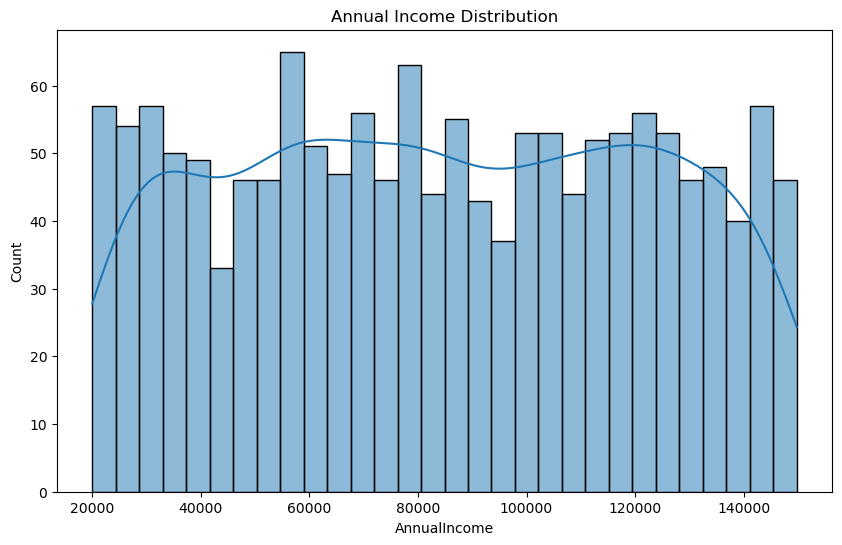

In [112]:
# Annual Income distribution
plt.figure(figsize=(10,6))
sns.histplot(df['AnnualIncome'], bins=30, kde=True)
plt.title('Annual Income Distribution')
plt.show()

In [153]:
unique_purchases = df_encoded['NumberOfPurchases'].unique()

print("Unique values in Number of Purchases:",np.sort( unique_purchases))

Unique values in Number of Purchases: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


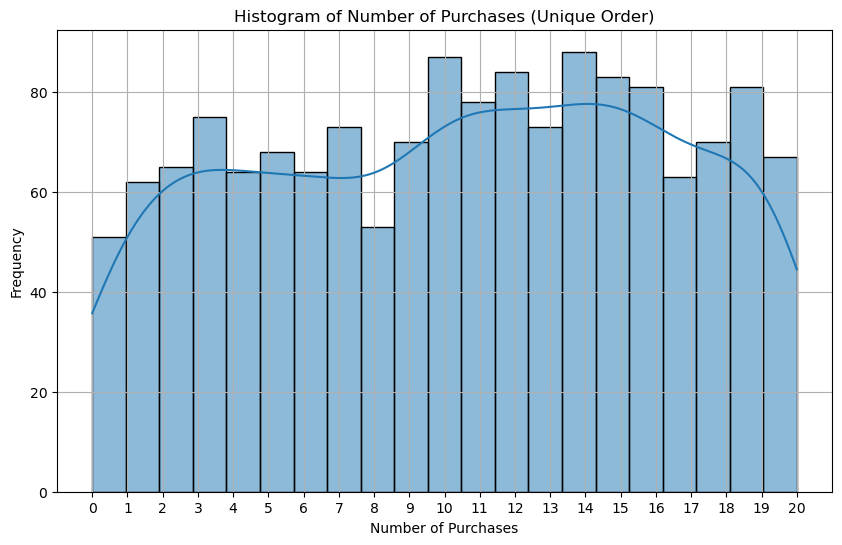

In [149]:
# Unique gözlemlere göre sıralama yap
df_sorted = df_encoded[df_encoded['NumberOfPurchases'].isin(unique_purchases)]
# Histogram çizimi
plt.figure(figsize=(10, 6))
sns.histplot(df_sorted['NumberOfPurchases'], bins=len(unique_purchases), kde=True)
plt.title('Histogram of Number of Purchases (Unique Order)')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.xticks(unique_purchases)  # X ekseni etiketleri unique_order'a göre ayarlanıyor
plt.grid(True)
plt.show()

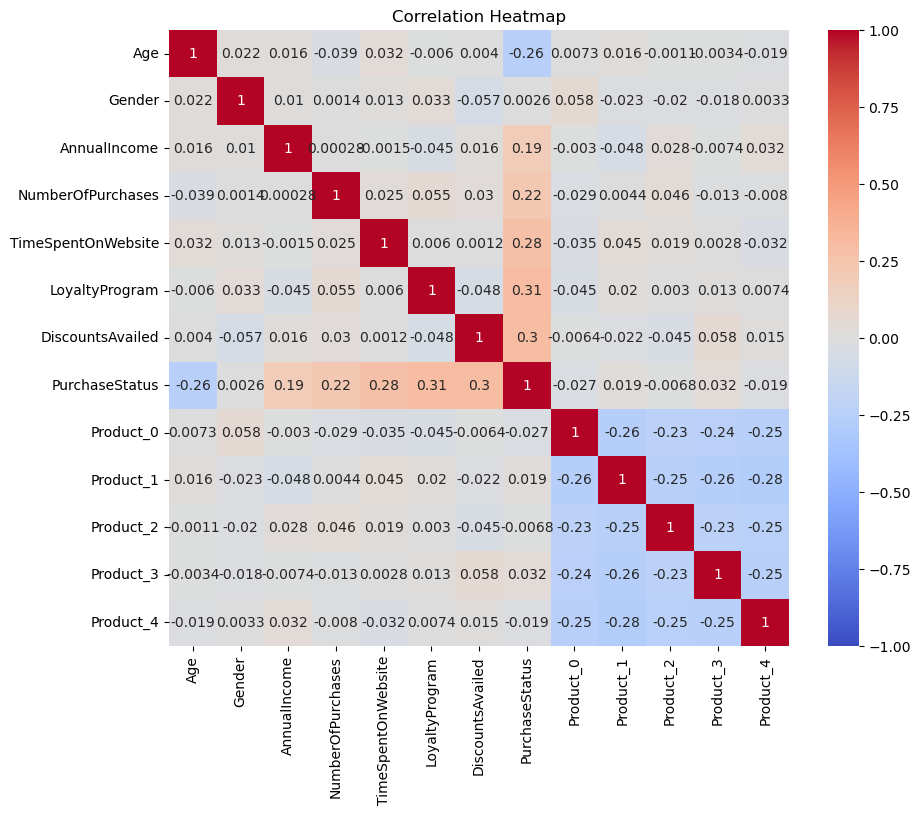

In [163]:
# Korelasyon matrisi oluşturma
corr_matrix = df_encoded.corr()

# Heatmap oluşturma
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


## Data Pre-processing

In [168]:
# Check for missing values
print(df.isnull().sum())

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64


In [170]:
# Split the data into features and target variable
X = df_encoded.drop('PurchaseStatus', axis=1)
y = df_encoded['PurchaseStatus']

In [172]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [174]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Models

In [177]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42).fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

In [179]:
# Decision Tree Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

Decision Tree Classifier:
 Accuracy: 0.9033333333333333
 Precision: 0.9304347826086956
 Recall: 0.8359375
 F1 Score: 0.8806584362139918


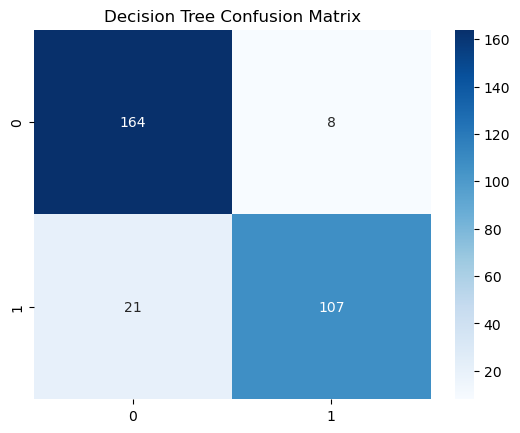

In [181]:
print(f'Decision Tree Classifier:\n Accuracy: {accuracy_dt}\n Precision: {precision_dt}\n Recall: {recall_dt}\n F1 Score: {f1_dt}')
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [183]:
#Random Forest 
rf_model = RandomForestClassifier(random_state=42).fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)

In [189]:
accuracy_rf=accuracy_score(y_test,y_pred_rf)
precision_rf=precision_score(y_test,y_pred_rf)
recall_rf=recall_score(y_test,y_pred_rf)
f1_rf=f1_score(y_test,y_pred_rf)
cm_rf=confusion_matrix(y_test,y_pred_rf)

Random Forest:
 Accuracy: 0.9566666666666667
 Precision: 0.9914529914529915
 Recall: 0.90625
 F1 Score: 0.9469387755102041


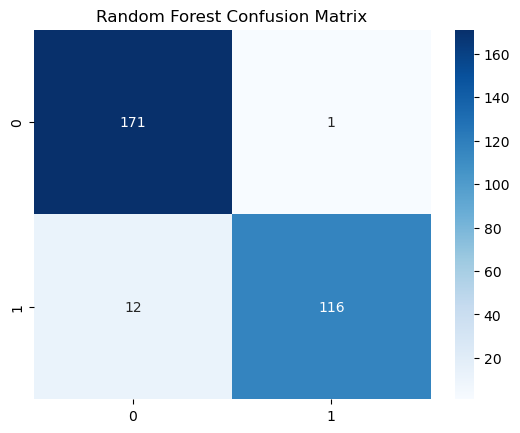

In [191]:
print(f'Random Forest:\n Accuracy: {accuracy_rf}\n Precision: {precision_rf}\n Recall: {recall_rf}\n F1 Score: {f1_rf}')
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [193]:
#support vector machine
svm_model = SVC(random_state=42).fit(x_train,y_train)
y_pred_svm=svm_model.predict(x_test)

In [197]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

Support Vector Machine:
 Accuracy: 0.85
 Precision: 0.8952380952380953
 Recall: 0.734375
 F1 Score: 0.8068669527896996


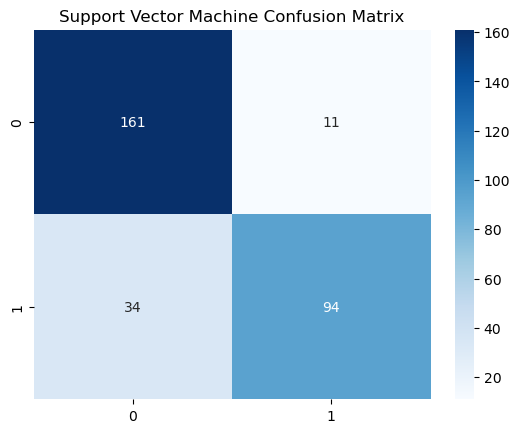

In [199]:
print(f'Support Vector Machine:\n Accuracy: {accuracy_svm}\n Precision: {precision_svm}\n Recall: {recall_svm}\n F1 Score: {f1_svm}')
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

In [202]:
from xgboost import XGBClassifier

In [212]:
xgb_model = XGBClassifier().fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)

In [215]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

XGBoost:
 Accuracy: 0.95
 Precision: 0.991304347826087
 Recall: 0.890625
 F1 Score: 0.9382716049382716


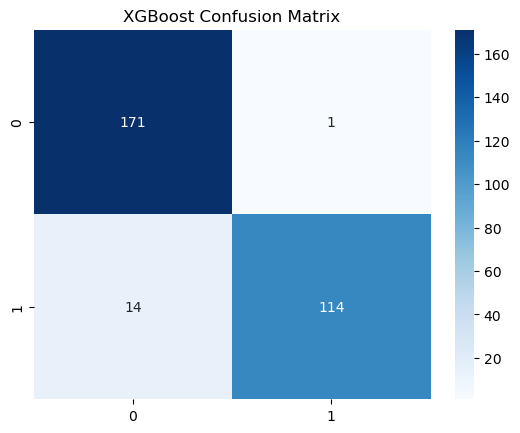

In [217]:
print(f'XGBoost:\n Accuracy: {accuracy_xgb}\n Precision: {precision_xgb}\n Recall: {recall_xgb}\n F1 Score: {f1_xgb}')
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.show()

## Summary

In this study, four classification models were evaluated for predicting customer purchase behavior: *XGBoost* and *Random Forest*, *Decision Tree Classifier*, and *Support Vector Machine (SVM)*.

Both **XGBoost** and **Random Forest** models stood out with high accuracy, precision, recall, and F1 scores. These models are recommended to predict customer purchasing behavior due to their reliability and good performance.
